# Sprint5 SVMスクラッチ

In [1]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.n_lambda = None
        self.n_support_vectors = None
        self.lam_sv = None
        self.X_sv = None
        self.y_sv = None
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
        # λの初期値
#         self.n_lambda = np.random.randn(X.shape[0])
        self.n_lambda = np.zeros(X.shape[0])
        y = y.reshape(-1, 1)
    
        
        # ラグランジュの未定乗数法による最急降下
        n_lambda = self._lagrange_multipliers(X, y)
        
        # ラグランジュ乗数 λ が設定した閾値より大きいデータのIndexを取得
        idx = np.where(n_lambda > self.threshold)
        
        # 問題2
        # 抽出したサンプルをサポートベクターとして保存
        self.X_sv = X[idx]
        self.y_sv = y[idx]
        self.lam_sv = n_lambda[idx]
        self.n_support_vectors = idx
        
    # 問題3
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """

        k_val = self._kernel_func(X, self.X_sv)   #カーネル関数
        calc = self.lam_sv*self.y_sv.T*k_val
        f_x = np.sum(calc, axis=1)
        
        # 推定結果を返す。（0以上であれば1をそれ以外は-1を返す）
        return np.where(f_x > 0, 1, -1)
    
    # 問題1
    def _lagrange_multipliers(self, X, y):
        """
        最急降下法を使って最適化する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        error : 次の形のndarray, shape (n_samples, n_features)
          予測値と正解値の誤差(y_pred - y)
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          最急降下法を実施した結果
        """
        
        for i in range(self.iter):

            k_val = self._kernel_func(X, X)
            
            # [n_samples,](1次元配列) * [n_samples, n_samples] : 行ごとに乗算
            calc = self.n_lambda * (y@y.T) * k_val
            self.n_lambda = self.n_lambda + self.lr * (1 - np.sum(calc, axis=1))
            
            # 更新毎に λi>=0を満たす必要があります。満たさない場合は λi=0とします。
            self.n_lambda = np.where(self.n_lambda >= 0, self.n_lambda, 0)
               
        return self.n_lambda

    # 問題1
    def _kernel_func(self, Xi, Xj):
        """
        カーネル関数を実施する。（線形カーネル）
        Parameters
        ----------
        Xi : 次の形のndarray, shape (n_samples, n_features)
           i番目のサンプルの特徴量
        Xj : 次の形のndarray, shape (n_samples, n_features)
           j番目のサンプルの特徴量
        Returns
        -------
          次の形のndarray, shape (n_samples, n_samples)
          カーネル関数を実施した結果
        """
        
        # n_samples x n_samples
        return Xi@Xj.T
    

## 【問題1】ラグランジュの未定乗数法による最急降下
---
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 λ

を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。

$$
λ^{new}_i=λ_i+α(1−\sum_{j=1}^{n}λ_jy_iy_jk(x_i,x_j))
$$
ここで k(x_i,x_j)

はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。
$$
k(xi,xj)=x^{T}_ix_j
$$
条件として、更新毎に λi>=0
を満たす必要があります。満たさない場合は λi=0

とします。

i,j: サンプルのインデックス

λnewi: 更新後のi番目のサンプルのラグランジュ乗数

λi: 更新前のi番目のサンプルのラグランジュ乗数

α: 学習率

λj: j番目のサンプルのラグランジュ乗数

yi: i番目のサンプルのラベル

yj: j番目のサンプルのラベル

xi: i番目のサンプルの特徴量ベクトル

xj: j番目のサンプルの特徴量ベクトル

あるサンプルに対してのすべてのサンプルとの関係を計算していくことになります。

## 【問題2】サポートベクターの決定
---
計算したラグランジュ乗数 λ

が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。

閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

## 【問題3】推定
---
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた f(x)

の符号が分類結果です。
$$
f(x)=\sum_{j=1}^{n}λ_ny_{sv_n}k(x,s_n)
$$

x: 推定したいデータの特徴量ベクトル

N: サポートベクターの数

n: サポートベクターのインデックス

λn: n番目のサポートベクターのラグランジュ乗数

ysvn: n番目のサポートベクターのラベル

k(): カーネル関数

sn: n番目のサポートベクターの特徴量

## 【問題4】学習と推定
---
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

>## データセット

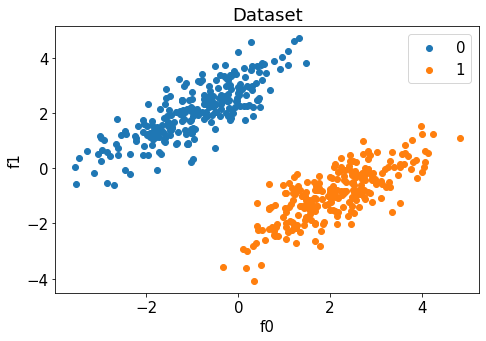

In [2]:
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])


import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(7,5))

plt.title('Dataset')
plt.xlabel('f0')
plt.ylabel('f1')
plt.scatter(X[:250,0], X[:250, 1] , label='0')
plt.scatter(X[250:,0], X[250:, 1] , label='1')

plt.legend()
plt.tight_layout()
plt.show()

In [3]:
def evaluate_performance_model(y_test_data, y_pred_data):
    '''
    検証データと推定したデータからAccuracy, Percision, Recall, F1の指標を計算する関数
    Parameters:
    --------------
        y_test_data : ndarray型
        検証データ
        y_pred_data : ndarray型
        推定データ
    Returns:
    --------------
    None
    '''
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix
    

    # 4種類の指標を計算する

    # Accuracy（正解率）
    print('Accuracy: \t%.2f' % accuracy_score(y_test_data, y_pred_data))

    # Precision（適合率）
    print('Precision: \t%.2f' % precision_score(y_test_data, y_pred_data))

    # Recall（再現率）
    print('Recall: \t%.2f' % recall_score(y_test_data, y_pred_data))

    # F値
    print('f1: \t\t%.2f' % f1_score(y_test_data, y_pred_data))
    
    # 混合行列
    print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_data, y_pred_data)))

>### Scratch実装コード

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# SVMスクラッチのインスタンス
num_iter = 500    # iterations
lr = 0.005   # learning rate

svc = ScratchSVMClassifier(num_iter, lr)
svc.fit(X_train_std, y_train)
y_pred = svc.predict(X_test_std)

# 指標値
evaluate_performance_model(y_test, y_pred)

Accuracy: 	1.00
Precision: 	1.00
Recall: 	1.00
f1: 		1.00
Confusion matrix:
[[75  0]
 [ 0 75]]


>### scikit-learnによる実装

In [5]:
#SVMモデル
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

# 指標値
evaluate_performance_model(y_test, y_pred)

Accuracy: 	1.00
Precision: 	1.00
Recall: 	1.00
f1: 		1.00
Confusion matrix:
[[75  0]
 [ 0 75]]


## 【問題5】決定領域の可視化
---
決定領域を可視化してください。

以下の例のようにサポートベクターは異なる色で示してください。

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, X_sv, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.01)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
#     contourf_color = ['pink', 'skyblue']
    contourf_color = ['skyblue', 'pink']
    n_class = 2
    plt.rcParams['font.size'] = 15
    fig = plt.figure(figsize=(8,6))
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=70, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    
    # plot support vectors
    plt.scatter(X_sv[:,0], X_sv[:, 1], color='lime', label='SV', s=70)
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


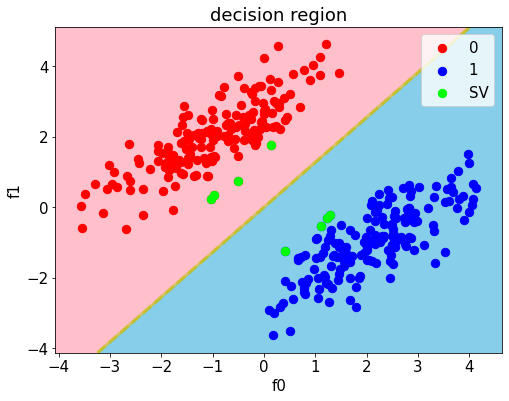

In [9]:
# サポートベクトルを取得(緑色)
X_sv = X_train[svc.n_support_vectors]
# 決定領域
decision_region(X_train, y_train, svc, X_sv, xlabel='f0', ylabel='f1')
